# Time series with Python

## Creating a time series DataFrame

In [ ]:
import pandas as pd
import numpy as np

dates = pd.date_range(start='2024-01-01', periods=120, freq='D')
data = pd.DataFrame({
    'Sales': np.random.randint(100, 200, size=120)
}, index=dates)

data


,Sales
2024-01-01,137
2024-01-02,138
2024-01-03,157
2024-01-04,128
2024-01-05,118
...,...
2024-04-25,147
2024-04-26,140
2024-04-27,167
2024-04-28,166


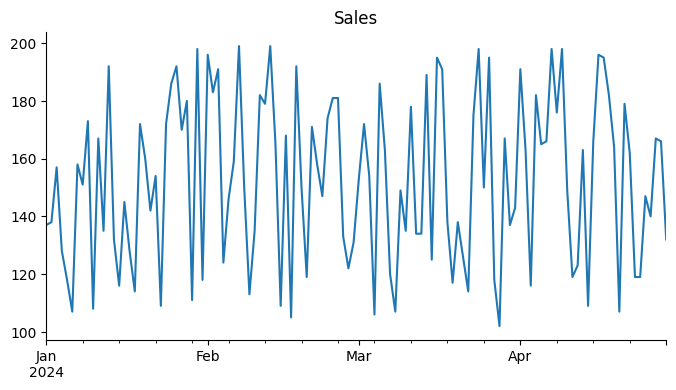

In [ ]:
from matplotlib import pyplot as plt
data['Sales'].plot(kind='line', figsize=(8, 4), title='Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

## Resampling time series data

In [3]:
monthly_data = data.resample('ME').sum()
print(monthly_data)

            Sales
2024-01-31   4568
2024-02-29   4562
2024-03-31   4609
2024-04-30   4559


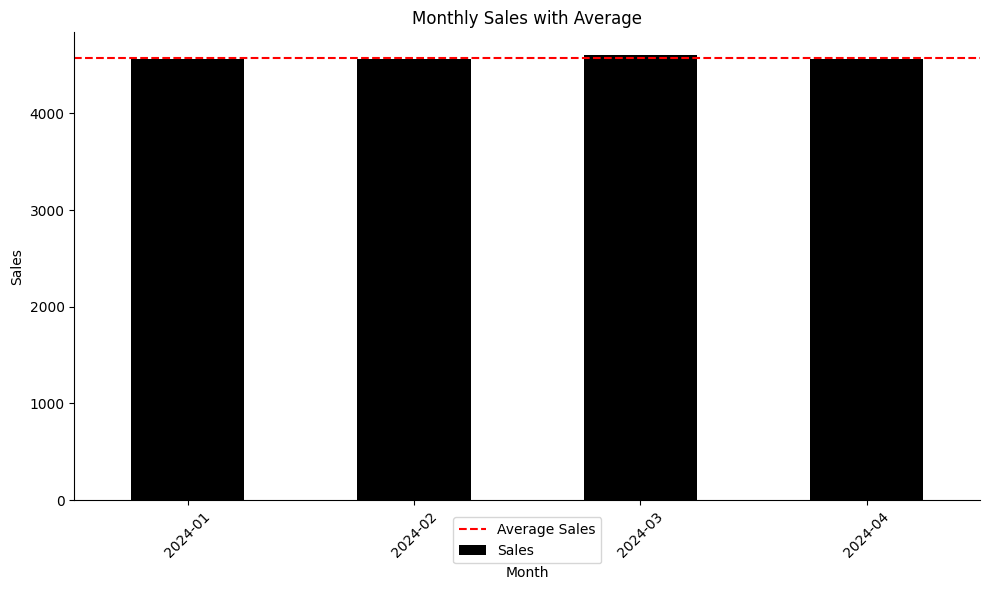

In [10]:
import matplotlib.pyplot as plt

average_sales = monthly_data['Sales'].mean()
ax = monthly_data['Sales'].plot(kind='bar', color='black', figsize=(10, 6))
plt.axhline(y=average_sales, color='red', linestyle='--', label='Average Sales')
plt.title('Monthly Sales with Average')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=1)
ax.set_xticklabels([date.strftime('%Y-%m') for date in monthly_data.index])
plt.xticks(rotation=45) 
plt.tight_layout()
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

### Handling Missing Dates in Time Series

In [11]:
# Create a DataFrame with some missing dates
dates = pd.to_datetime(['2023-01-01', '2023-01-03', '2023-01-05'])
data_with_gaps = pd.DataFrame({
    'Sales': [150, 200, 180]
}, index=dates)

full_dates = pd.date_range(start='2023-01-01', end='2023-01-07')
data_filled = data_with_gaps.reindex(full_dates)
data_filled_ffill = data_filled.ffill()
print(data_filled_ffill)

            Sales
2023-01-01  150.0
2023-01-02  150.0
2023-01-03  200.0
2023-01-04  200.0
2023-01-05  180.0
2023-01-06  180.0
2023-01-07  180.0


## Shifting Time Series Data

In [12]:
data_shifted = data.shift(1)
data['Daily Change'] = data['Sales'] - data_shifted['Sales']
print(data)

            Sales  Daily Change  3-day Rolling Avg
2024-01-01    137           NaN                NaN
2024-01-02    138           1.0                NaN
2024-01-03    157          19.0         144.000000
2024-01-04    128         -29.0         141.000000
2024-01-05    118         -10.0         134.333333
...           ...           ...                ...
2024-04-25    147          28.0         128.333333
2024-04-26    140          -7.0         135.333333
2024-04-27    167          27.0         151.333333
2024-04-28    166          -1.0         157.666667
2024-04-29    132         -34.0         155.000000

[120 rows x 3 columns]


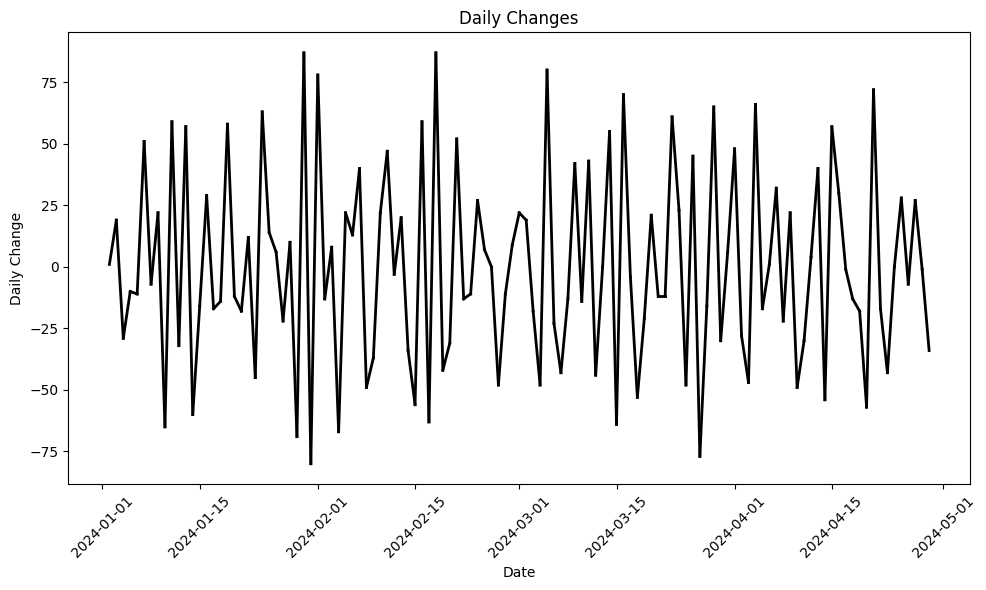

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a custom color array: blue if Daily Change >= 0, black if Daily Change < 0
colors = ['black' if change >= 0 else 'black' for change in data['Daily Change']]
plt.figure(figsize=(10, 6))
for i in range(1, len(data)):
    sns.lineplot(x=data.index[i-1:i+1], y=data['Daily Change'].iloc[i-1:i+1], color=colors[i], linewidth=2)
plt.title('Daily Changes')
plt.xlabel('Date')
plt.ylabel('Daily Change')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Rolling window calculations

In [15]:
data['3-day Rolling Avg'] = data['Sales'].rolling(window=3).mean()
print(data)

            Sales  Daily Change  3-day Rolling Avg
2024-01-01    137           NaN                NaN
2024-01-02    138           1.0                NaN
2024-01-03    157          19.0         144.000000
2024-01-04    128         -29.0         141.000000
2024-01-05    118         -10.0         134.333333
...           ...           ...                ...
2024-04-25    147          28.0         128.333333
2024-04-26    140          -7.0         135.333333
2024-04-27    167          27.0         151.333333
2024-04-28    166          -1.0         157.666667
2024-04-29    132         -34.0         155.000000

[120 rows x 3 columns]


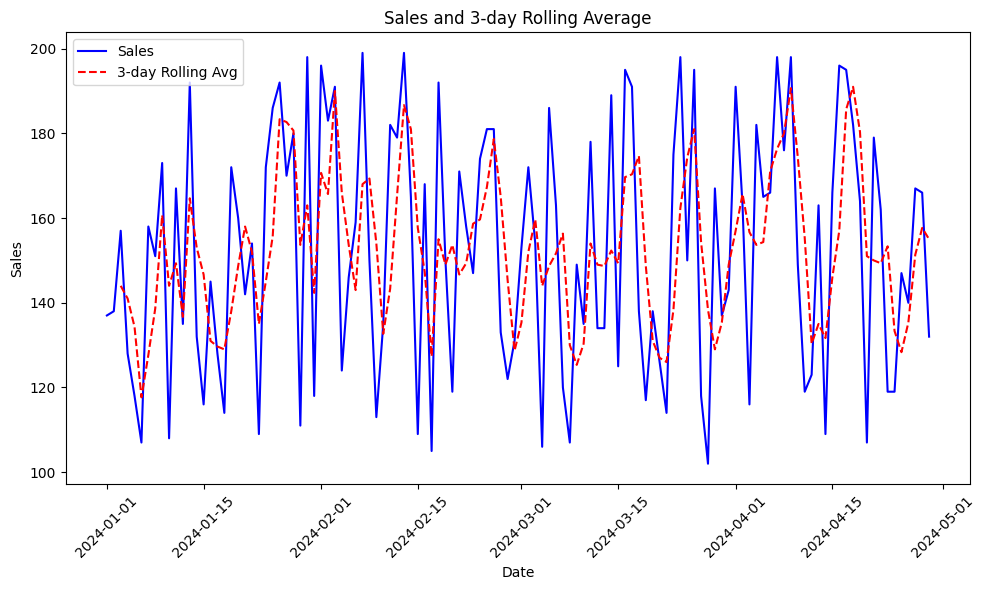

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(x=data.index, y=data['Sales'], label='Sales', color='blue')
sns.lineplot(x=data.index, y=data['3-day Rolling Avg'], label='3-day Rolling Avg', color='red', linestyle='--')
plt.title('Sales and 3-day Rolling Average')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
